In [28]:
import sqlalchemy
import getpass
import matplotlib.pyplot as plt

upass=getpass.getpass("Enter Your Password for Postgres: ")
from sqlalchemy import create_engine
engine = sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL(
        drivername="postgresql",
        username="postgres",
        password=upass,
        host="localhost",
        port="5432",
        database="Employees",
    ),
    echo_pool=True,
)

import pandas as pd

Enter Your Password for Postgres: ········


In [29]:
connection = engine.connect()

In [30]:
query = "select * from salaries"
query.replace("\n","")

'select * from salaries'

In [31]:
salary_df=pd.read_sql_query(query,connection)

In [32]:
salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

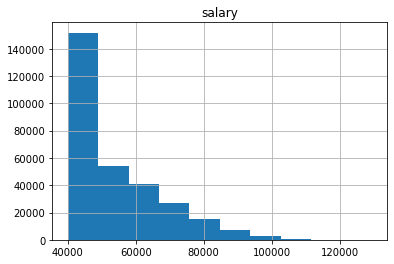

In [33]:
salary_df.hist(column = 'salary')

In [34]:
query = "select * from titles"
query.replace("\n","")

'select * from titles'

In [35]:
titles_df=pd.read_sql_query(query,connection)

In [36]:
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [37]:
merge_data = pd.merge(salary_df, titles_df, on='emp_no')
salary_title = merge_data.groupby(['title']).mean()

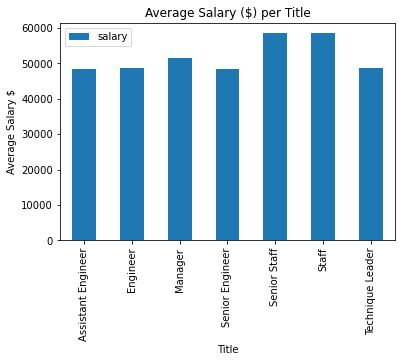

In [40]:
salary_title.plot(kind='bar')
plt.title('Average Salary ($) per Title')
plt.xlabel('Title')
plt.ylabel("Average Salary $")
plt.show()